# Spam Classifier

# Introduction: 

          The intruding onslought of unwanted email, which is termed as Spam, has prompted the necessaity to make effective and efficient Spam-Filter. Thus, utilizing the capability of Machine Learning Algorithms has been essential as solution for the detection and filteration of the Spam Email, interestingly in the world of Natural language Proocessing (NLP). In the everchaing realm, the Spam Emails often potray some discrenible traits, revealing unmsitanken terms that well suits the purpose of exposing their signs as malicious and harmful.      

# The task at hand: 
        
          This project bears the responsibility to detect Spam Emails that demands intricate algorithms capable of understanding and seperating the nuances of textual contents of Emails. Indentifying the necessary patterns and features that exposes the Spam nature is the main criteria. In this endeavor, we will try to explore a number of techniques,  and alogorithms, which has some traditional makrings like, Naive-Bayes and SVM up to advanced approaches like Nueral Network and Ensemble Methods.  

# Preparing Solutions: 

          Interestingly, these ML solutions provide features like the presence of certain terms, text structure, and frequency of certain words. Also, this effective Spam Filter surpasses prowess of Algorithmic Traits, necessitating ongoing adaption of ever-going spaming techniques. 

# Contents: 

**1. Importing Libraries**

**2. Data Explorations**

**3. EDA**

**4.Feature Scaling and Transformation**

**5. Text Incantation**

**6. Model Implementation**

**7. Evaluation**

In [1]:

import pandas as pd
import numpy as np

# disabling warnings
import warnings
warnings.filterwarnings ('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import wordcloud

# nltk
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Modeling 
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# scoring
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import accuracy_score, classification_report

# N/N
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Load dataset
df = pd.read_csv('SMS_Spam_Collection.csv', sep='\t', names=['label', 'message'])
# print(df)

In [3]:
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.tail(10) 

,label,message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.sample(5)

,label,message
1461,ham,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...
2296,ham,HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GO...
3171,ham,"Mah b, I'll pick it up tomorrow"
3518,ham,So you think i should actually talk to him? No...
3682,ham,LOL what happens in Vegas stays in vegas


Text(0.5, 1.0, 'Distribution of missing values')

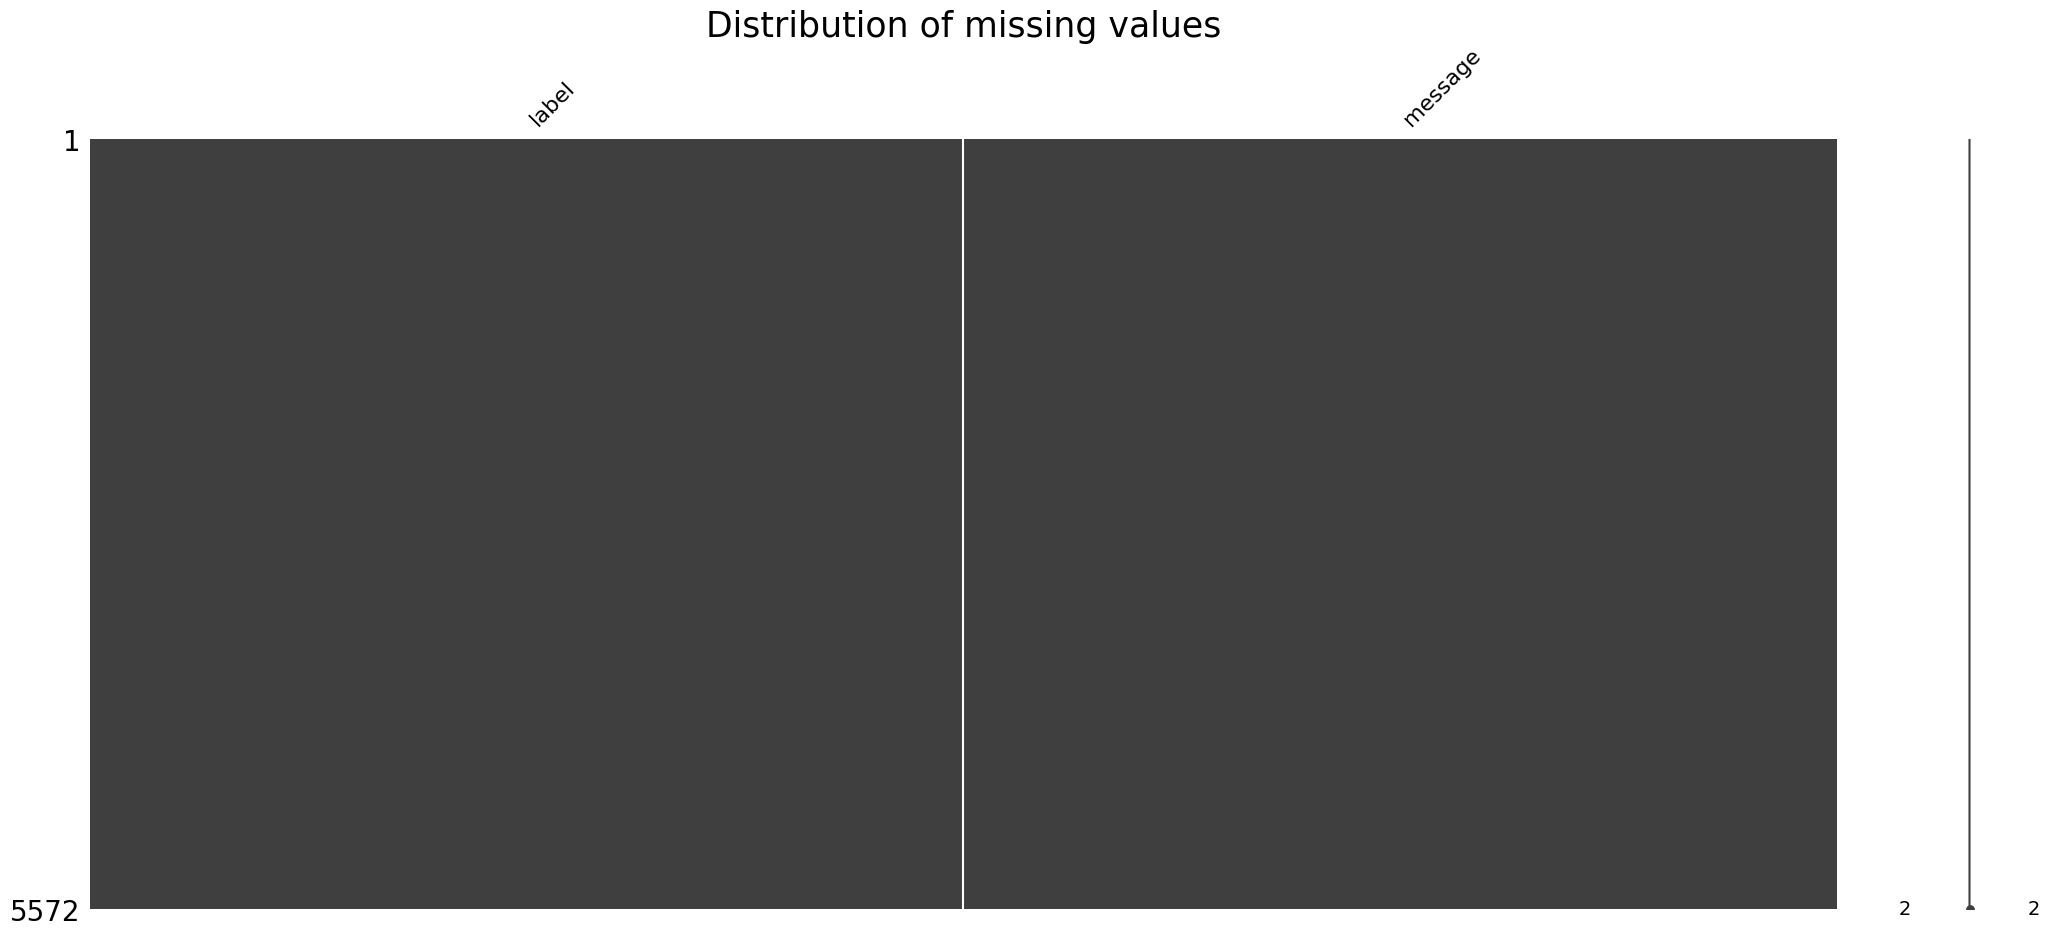

In [6]:
msno.matrix(df).set_title('Distribution of missing values',fontsize=25)

In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

No null values have been deteected. Still, we need to prreprocess the data to make successful models. 

In [10]:
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')

(5169, 2)
0


In [11]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
print(df.shape)

(5169, 2)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
#renaming the column names 
df.rename(columns = {'label': 'target', 'message':'text'}, inplace=True)
# df.rename(columns = {'Text':'text'}, inplace = True)

#showing the edited dataframe
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

# Data Preprocessing:

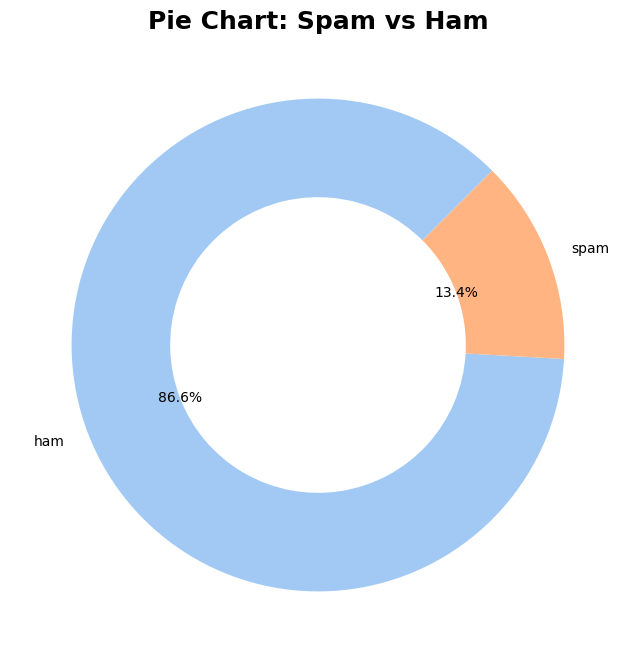

In [19]:
label_ct = df['target'].value_counts()

# Set the color palette for the pie chart
colors = sns.color_palette('pastel')

# Create a pie chart using Matplotlib and Seaborn
plt.figure(figsize=(10, 8))
plt.pie(label_ct, labels=label_ct.index, autopct='%1.1f%%', colors=colors, startangle=45, wedgeprops=dict(width=0.4))
plt.title('Pie Chart: Spam vs Ham', fontsize=18, fontweight='bold')
plt.show()

In [20]:
labels = pd.get_dummies(df["target"])
spam_or_not = pd.concat([df, labels], axis=1)
spam_or_not.drop('target', axis=1, inplace=True)

df["length"] = df["text"].apply(len)

# Filter rows based on the 'ham' category
ham = df.loc[spam_or_not['ham'] == 1].reset_index(drop=True)
spam = df.loc[spam_or_not['ham'] == 0].reset_index(drop=True)

In [21]:
df

,target,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


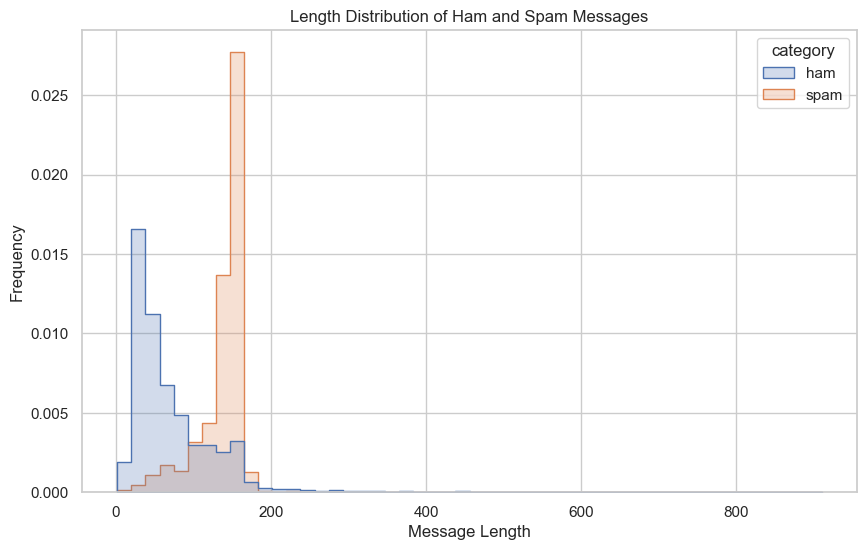

In [22]:
# Concatenate ham and spam DataFrames
combined_df = pd.concat([ham.assign(category='ham'), spam.assign(category='spam')])

# Set the style for Seaborn
sns.set(style="whitegrid")

# Use Seaborn's displot for better flexibility
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='length', hue='category', bins=50, stat='density', common_norm=False, element='step', 
             kde=False)
plt.title('Length Distribution of Ham and Spam Messages')
plt.xlabel('Message Length')
plt.ylabel('Frequency')

# Move the legend outside the plot
# plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize layout using Matplotlib
plt.grid(True)

# Show the plot
plt.show()

In [23]:
import plotly.express as px

# Assuming ham and spam DataFrames are already defined

# Concatenate ham and spam DataFrames
combined_df = pd.concat([ham.assign(label='ham'), spam.assign(label='spam')])

# Create an interactive histogram using Plotly Express
fig = px.histogram(combined_df, x='length', color='target', nbins=30,
                   labels={'target': 'Message Length'},
                   title='Length Distribution of Ham and Spam Messages',
                   template='plotly_white',  # Set background to white
                   opacity=0.6,  # Adjust opacity for better visibility
                   color_discrete_map={'ham': 'black', 'spam': 'red'})

# Customize layout
fig.update_layout(
    xaxis_title='Message Length',
    yaxis_title='Frequency',
    legend_title='Category',
    bargap=0.2,  # Set gap between bars
)

# Show the interactive plot
fig.show()

In [25]:
# Assuming ham and spam DataFrames are already defined

# Concatenate ham and spam DataFrames
combined_df = pd.concat([ham.assign(category='ham'), spam.assign(category='spam')])

# Create an interactive histogram using Plotly Express
fig = px.histogram(combined_df, x='length', color='category', nbins=50,
                   marginal='rug', # Display rug plot along the x-axis
                   labels={'length': 'Message Length'},
                   title='Length Distribution of Ham and Spam Messages',
                   template='plotly_white',  # Set background to white
                   opacity=0.7, # Set opacity for better visibility
                   color_discrete_map={'ham': 'black', 'spam': 'red'})

# Customize layout
fig.update_layout(
    xaxis_title='Message Length',
    yaxis_title='Frequency',
    legend_title='Category',
    bargap=0.2, # Set gap between bars
)
# Show the interactive plot
fig.show()

# Ham and Spam Messages Analysis: 

Exploring Unigrams of Ham and Spam messages. 

1. Term Frequency by Ham messagaes: BarPlot, WordCloud
2. Term Frequency by Spam messages: Barplot, WordCloud


Defined Functions are, - 
1. get_str() - get string from a list,
2. get_all_str() - get all string from the dataframe column
3. get_word() - get words from text using RegexpTokenizer 
4. stopword_list - To add stopwords to the NLTK stopword list
5. freq_df() - to get a dataframe from a clean word list
6. remove_stopword() - remove stopwords from the list
7. lemmatization() - to lemmatize words
8. word_cloud() - plot a wordcloud of words

In [26]:
# function to get all of strings from dataframe column, and used lower function here.
def get_all_str(df):
    sentence = ''
    for i in range(len(df)):
        sentence += df['text'][i]
    sentence = sentence.lower()
    return sentence

In [27]:
def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence


In [28]:
df

,target,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [29]:
# function to get words from text(string). used RegexpTokenizer
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
#     result = result.lower()                                              
#     result = nltk.word_tokenize(text)
    return result

In [30]:
# function to add stopwords to nltp stopword list.
def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst


In [31]:
# function to remove stopwords from list.
def remove_stopword(stopwords, lst):
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
    return cleanwordlist

In [32]:
# function to get dataframe from cleanwordlist.
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq


In [33]:

# function to lemmatize words
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

# Visualization of Functions: 

In [44]:
df

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [34]:
# function to plot word cloud of words

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=100,
               colormap= colormap,
               max_font_size=140,
               min_font_size = 2,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Term Freq by Ham Messages:

In [35]:
ham.tail(5)

,target,text,length
4820,ham,Huh y lei...,12
4821,ham,Will ü b going to esplanade fr home?,36
4822,ham,"Pity, * was in mood for that. So...any other s...",57
4823,ham,The guy did some bitching but I acted like i'd...,125
4824,ham,Rofl. Its true to its name,26


# Remove stopwords:

In [41]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Pritam -
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pritam -
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [42]:


string = get_all_str(ham)
words = get_word(string)
removed = remove_stopword('1', words)

# e.g., show 10 words
print(removed[:10])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la']


# Bar Plot of Ham Messages:

In [43]:
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

# Create an interactive bar plot with Plotly Express
fig = px.bar(
    top_10,
    x='Term',
    y='Frequency',
    text='Frequency',
    color='Term',
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    title='Top 10 Ham Terms',
    labels={'Frequency': 'Term Frequency'},
    template='plotly_dark',  # Use a dark template for a sleek look
    height=500,  # Set the height of the plot
)

# Customize the appearance of the bars
for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"

# Adjust the position and size of the text labels
fig.update_traces(textposition='inside', textfont_size=12)

# Add gridlines for better readability
fig.update_layout(xaxis_showgrid=True, yaxis_showgrid=True)

# Customize axes titles and ticks
fig.update_layout(xaxis_title='Terms', yaxis_title='Term Frequency')
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability

# Show the plot
fig.show()

**Top 3 words in Ham Category:** 
  These are 'u', '2', 'gt'.


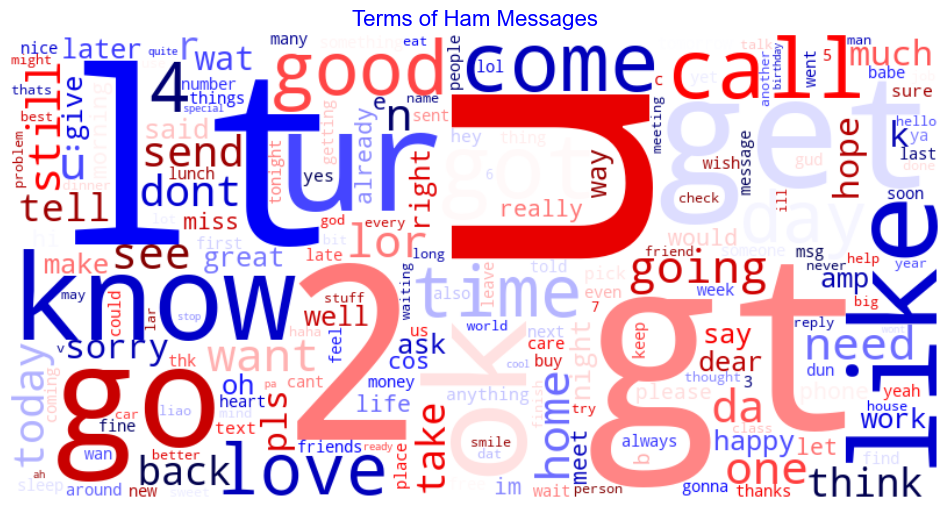

In [46]:
from wordcloud import WordCloud

data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))

# Create a WordCloud object

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'seismic',
                      max_words = 200, contour_width = 3, contour_color = 'steelblue',
                      relative_scaling = 0.5)

# Generate word cloud
wordcloud.generate_from_frequencies(data)

# Plot the WordCloud image
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Terms of Ham Messages', fontsize = 16, color='blue')

# Show the plot
plt.show()

# Term Frequency by Spam Messages:

In [47]:
string = get_all_str(spam)
words = get_word(string)
removed = remove_stopword('1',words)

In [48]:
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

fig = px.bar(top_10, x='Term', y='Frequency', text='Frequency',
             color='Frequency', 
             color_continuous_scale='Viridis',  # You can choose other color scales
             title='Rank of Spam Terms',
             labels={'Frequency': 'Frequency Count'},
             template='plotly_dark')

fig.update_traces(textposition='outside', textfont_size=12)

fig.update_layout(
    xaxis=dict(title='Terms', showgrid=False),
    yaxis=dict(title='Frequency Count', showgrid=False),
    coloraxis_colorbar=dict(title='Frequency'),
)

fig.show()

**Top 2 frequency terms in Spam Messages:**   'call', '2', 'free'.

# Word Cloud of Spam Messages:

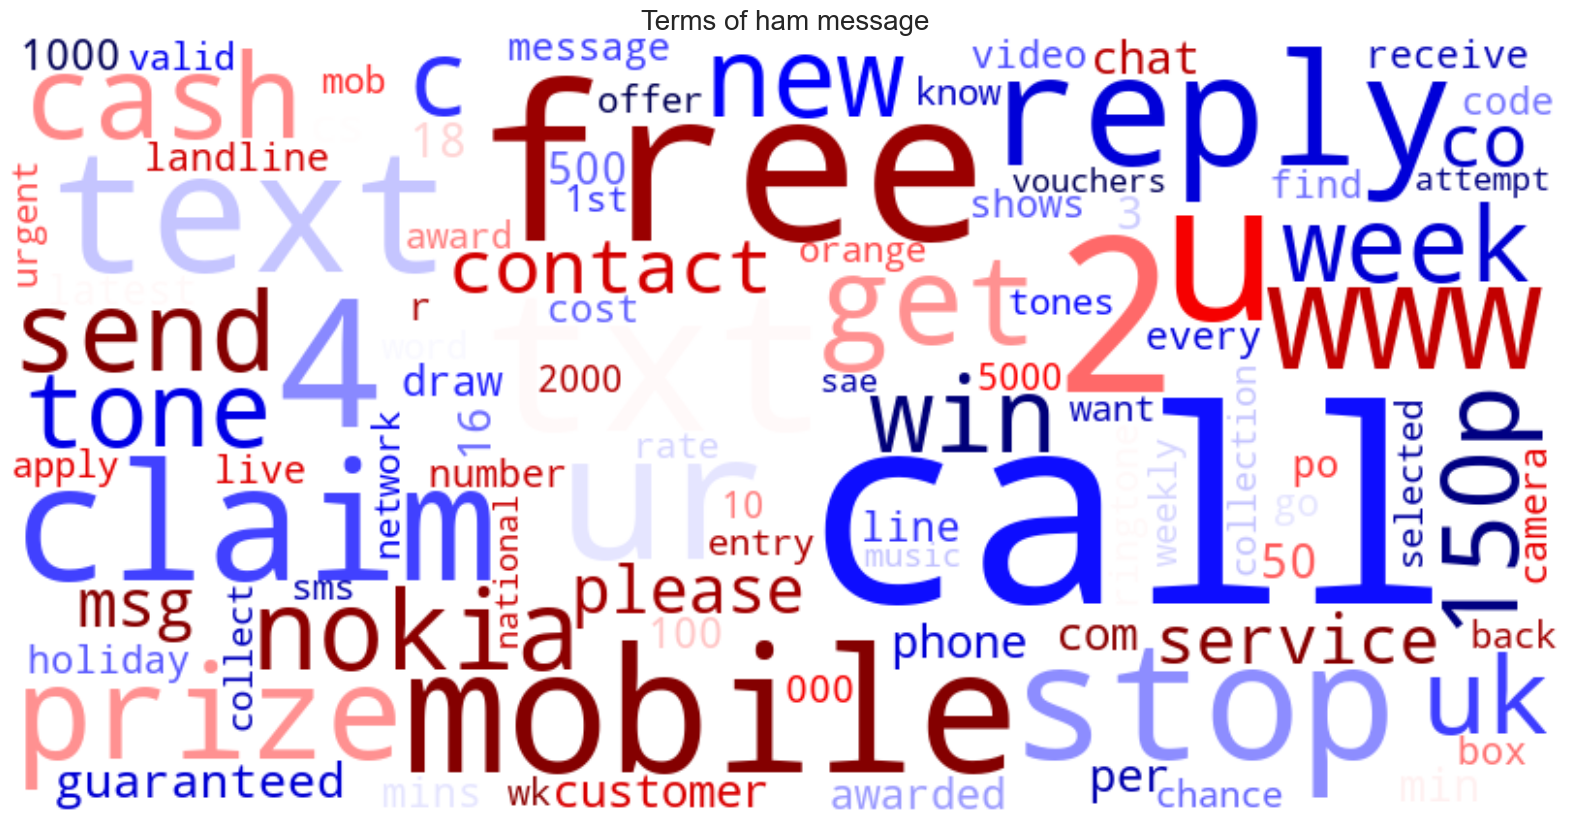

In [49]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

spam_wordcloud = Word_Cloud(data, 'white','seismic', 'Terms of ham message')

**Word Cloud Comparison:** 'free', 'win', 'prize', 'awarded'.


# Text Preprocessing for Spam Detection:

In [50]:
def preprocess(sentence):
    words = get_word(sentence)
    words_ltz = lemmatization(words)
    removed = remove_stopword('1',words_ltz)
    return removed


In [51]:

df.replace('ham',1,inplace=True)
df.replace('spam',0,inplace=True)
df.head()

,target,text,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


**Count Vectorizer:**

   It's a feature exraction technique, used in NLP and ML. It helps to convert a collection of Text Document to a Matix of Token Counts, where each row of the Matrix represents a Document, whereas each column represents a Unique Word in the entire collection.  

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Pritam -
[nltk_data]     PC\AppData\Roaming\nltk_data...


True

**TF-IDF Transformer:**

           It's anumerical statistics that reflects how important a word is to a document in collection or a corpus. It's widely used in text pre-processing and NLP tasks. 
           TF (Term Frequency) mneasures the frequency of a term in a document, and IDF (inverse Docuemnt Frequency) which adjusts the importance of a term based on its occurance across the entire corpus. 
           Now, in the present scenario, TF-IDF is applied to transform the Raw Data into Numerical Features, allowing the ML Models to understand and learn from the Textual Context. 

In [55]:
vector = CountVectorizer(analyzer=preprocess)
X = vector.fit(df['text'])
X_transform = X.transform(df['text'])

**Train- Test Split:**
  
     Train-test split is a crucial step in machine learning model development. It involves splitting the dataset into two subsets: the training set used to train the model and the test set used to evaluate its performance. The training set is used to teach the model patterns and relationships within the data, while the test set is used to assess how well the model generalizes to new, unseen data. Common splits include 80-20 or 70-30, where the larger portion is used for training. The goal is to strike a balance between training the model effectively and ensuring it performs well on new data.In the context of spam email detection, the train-test split is essential to validate the model's ability to distinguish between spam and non-spam emails accurately.


In [56]:
tfidf_transformer = TfidfTransformer().fit(X_transform)
X = tfidf_transformer.transform(X_transform)

In [59]:
# Split dataset into train set and test set, by ratio of 0.3
train_X, test_X, train_y, test_y = train_test_split(X, df['target'], test_size=0.30, random_state = 8888) 

**Text Classification Models:**

            5 Models are used here. 
        1. Random Forest Classifier,
        2. LightGBM Classifier,
        3. XGB Classifier,
        4. Support Vector Classifier,
        5. Cat-Boost Classifier.

        

# Training Models:

  In this section, we initialize and train five different classification models on the training dataset.
  
   **Initialize Classifiers:**           
                1. RandomForestClassifier: A machine learning model based on the random forest algorithm.

                2. LGBMClassifier: LightGBM is a gradient boosting framework that uses tree-based learning algorithms.

                3. XGBClassifier: XGBoost is an optimized gradient boosting library.

                4. SVC (Support Vector Classifier): A classifier that works by finding a hyperplane that best separates the classes.
                
                5. CatBoostClassifier: CatBoost is a gradient boosting library that handles categorical features automatically.

  **Training the Models:** 
              Each classifier is trained using the 'fit' method on the training data 'train_X' and 'train_y'.

**Create a List of Classifiers and Model Names:**

            1. A list named 'classifiers' is created to store the trained classifiers.
            
            2. Another list named 'model_name' is created to store the names of the models.

In [60]:
rfc=RandomForestClassifier(random_state=8888)
lgbm = LGBMClassifier(boosting_type='gbdt',objective='binary',random_state=8888)
xgbr = xgb.XGBClassifier(objective='binary:hinge',random_state=8888)
svc = SVC(probability=True,random_state=8888)
catboost = CatBoostClassifier(random_state=8888, logging_level='Silent')

In [61]:
rfc.fit(train_X,train_y)
lgbm.fit(train_X, train_y)
xgbr.fit(train_X, train_y)
svc.fit(train_X, train_y)
catboost.fit(train_X,train_y,verbose=0)

[LightGBM] [Info] Number of positive: 3359, number of negative: 541
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6641
[LightGBM] [Info] Number of data points in the train set: 3900, number of used features: 351
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.861282 -> initscore=1.825979
[LightGBM] [Info] Start training from score 1.825979


In [62]:
classifiers = []
classifiers.append(svc)
classifiers.append(rfc)
classifiers.append(xgbr)
classifiers.append(lgbm)
classifiers.append(catboost)


In [63]:

model_names = ['SVC', 'Random Forest', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

In [64]:
accuracy_list = []
auc_list = []
recall_list = []
f1_list = []

In [65]:
for classifier in classifiers:
    y_pred_proba = classifier.predict_proba(test_X)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions to avoid any errors

    accuracy_list.append(accuracy_score(test_y, y_pred))
    auc_list.append(roc_auc_score(test_y, y_pred_proba))
    recall_list.append(recall_score(test_y, y_pred))
    f1_list.append(f1_score(test_y, y_pred))

metrics_df = pd.DataFrame({
    'Model': [classifier.__class__.__name__ for classifier in classifiers],
    'Accuracy': accuracy_list,
    'AUC': auc_list,
    'Recall': recall_list,
    'F1': f1_list
})

for model_name, accuracy, auc, recall, f1 in zip([classifier.__class__.__name__ for classifier in classifiers], 
                                                 accuracy_list, auc_list, recall_list, f1_list):
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("=" * 40)

SVC Metrics:
Accuracy: 0.9844, AUC: 0.9854, Recall: 0.9952, F1 Score: 0.9912
RandomForestClassifier Metrics:
Accuracy: 0.9767, AUC: 0.9851, Recall: 0.9986, F1 Score: 0.9869
XGBClassifier Metrics:
Accuracy: 0.9653, AUC: 0.9093, Recall: 0.9836, F1 Score: 0.9803
LGBMClassifier Metrics:
Accuracy: 0.9767, AUC: 0.9768, Recall: 0.9911, F1 Score: 0.9868
CatBoostClassifier Metrics:
Accuracy: 0.9779, AUC: 0.9760, Recall: 0.9966, F1 Score: 0.9875


In [66]:
import plotly.graph_objects as go
def plot_model_score(model_names, metrics_dict, title):
    color_dict = {
        'Accuracy': '#97bad9',
        'AUC': '#bcd6ef',
        'Recall': '#ebcad9',
        'F1': '#d5a6bd'
    }

    fig = go.Figure()

    for metric, color in color_dict.items():
        fig.add_trace(go.Bar(
            name=metric,
            x=model_names,
            y=np.round(metrics_dict[metric], 3),
            text=np.round(metrics_dict[metric], 3),
            marker_color=color
        ))

    fig.update_layout(template='plotly_white', title=title)
    fig.update_layout(xaxis_title="Models", yaxis_title="Score", font=dict(size=17, family='Franklin Gothic'))
    fig.update_layout(yaxis_range=[0.7, 1])

    fig.show()

In [67]:
# Example usage:
model_names = [classifier.__class__.__name__ for classifier in classifiers]

In [68]:
# Assuming metrics_dict is a dictionary containing accuracy, auc, recall, and f1 lists
metrics_dict = {
    'Accuracy': accuracy_list,
    'AUC': auc_list,
    'Recall': recall_list,
    'F1': f1_list
}


In [69]:
plot_model_score(model_names, metrics_dict, 'Model Evaluation Metrics')

# Model Evaluation Summary:

Here we can see that SVC got the highest AUC score, and Random Forest the next. Consider that models may exist overfitting, let's see mean values of cross-validation score.

In [70]:
# Set random_state
random_state = 8888
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [71]:
# Initialize lists for cross-validation means
cv_accuracy_means = []
cv_auc_means = []
cv_recall_means = []
cv_f1_means = []

In [72]:
# Evaluate each classifier
for classifier in classifiers:
    # Cross-validation results
    cv_accuracy = cross_val_score(classifier, train_X, y=train_y, scoring="accuracy", cv=kfold)
    cv_auc = cross_val_score(classifier, train_X, y=train_y, scoring='roc_auc', cv=kfold)
    cv_recall = cross_val_score(classifier, train_X, y=train_y, scoring='recall', cv=kfold)
    cv_f1 = cross_val_score(classifier, train_X, y=train_y, scoring='f1', cv=kfold)

    # Append mean scores to respective lists
    cv_accuracy_means.append(cv_accuracy.mean())
    cv_auc_means.append(cv_auc.mean())
    cv_recall_means.append(cv_recall.mean())
    cv_f1_means.append(cv_f1.mean())

    # Print or log the results if needed
    print(f"{classifier.__class__.__name__} Cross-Validation Means:")
    print(f"Accuracy: {cv_accuracy.mean():.4f}, AUC: {cv_auc.mean():.4f}, Recall: {cv_recall.mean():.4f}, F1: {cv_f1.mean():.4f}")
    print("=" * 40)

# takes some time ;-) (20-25 mins)

SVC Cross-Validation Means:
Accuracy: 0.9713, AUC: 0.9962, Recall: 1.0000, F1: 0.9836
RandomForestClassifier Cross-Validation Means:
Accuracy: 0.9756, AUC: 0.9941, Recall: 0.9994, F1: 0.9861
XGBClassifier Cross-Validation Means:
Accuracy: 0.9667, AUC: 0.9280, Recall: 0.9815, F1: 0.9807
[LightGBM] [Info] Number of positive: 2687, number of negative: 433
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4899
[LightGBM] [Info] Number of data points in the train set: 3120, number of used features: 278
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.861218 -> initscore=1.825443
[LightGBM] [Info] Start training from score 1.825443
[LightGBM] [Info] Number of positive: 2687, number of negative: 433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003809 seconds.
You can set `force_row_wise=true` to remove the over

In [73]:
cv_metrics_dict = {
    'Accuracy': cv_accuracy_means,
    'AUC': cv_auc_means,
    'Recall': cv_recall_means,
    'F1': cv_f1_means
}

# Takes some time 

In [74]:
plot_model_score(model_names, cv_metrics_dict, 'Cross Validation - 5Fold')

# Ensemble Model Decision: 

   It's evident that Random Forest, LGBMClassifier, and CatBoostClassifier consistently achieved high scores across various metrics. Consequently, these three models have been chosen to form an ensemble model using a voting classifier.

In [75]:
votingC = VotingClassifier(estimators=[('light gbm', lgbm),('Random Forest', rfc),
                                       ('Cat boost',catboost)],voting='soft')

In [76]:
votingC = votingC.fit(train_X, train_y)

[LightGBM] [Info] Number of positive: 3359, number of negative: 541
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6641
[LightGBM] [Info] Number of data points in the train set: 3900, number of used features: 351
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.861282 -> initscore=1.825979
[LightGBM] [Info] Start training from score 1.825979


In [77]:
v_accuracy = cross_val_score(votingC, train_X, y = train_y, scoring = "accuracy", cv = kfold)
v_auc = cross_val_score(votingC, train_X, y = train_y, scoring = "roc_auc", cv = kfold)
v_recall = cross_val_score(votingC, train_X, y = train_y, scoring = "recall", cv = kfold)
v_f1 = cross_val_score(votingC, train_X, y = train_y, scoring = "f1", cv = kfold)

# takes some time

[LightGBM] [Info] Number of positive: 2687, number of negative: 433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4899
[LightGBM] [Info] Number of data points in the train set: 3120, number of used features: 278
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.861218 -> initscore=1.825443
[LightGBM] [Info] Start training from score 1.825443
[LightGBM] [Info] Number of positive: 2687, number of negative: 433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4924
[LightGBM] [Info] Number of data points in the train set: 3120, number of used features: 277
[LightGBM] [Info] [binary:

In [ ]:
votingC_accuracy_mean = v_accuracy.mean()
votingC_auc_mean = v_auc.mean()
votingC_recall_mean = v_auc.mean()
votingC_f1_mean = v_auc.mean()

In [ ]:
model_names.append('Voting Classifier')

In [ ]:
cv_accuracy_means.append(votingC_accuracy_mean)
cv_auc_means.append(votingC_auc_mean)
cv_recall_means.append(votingC_recall_mean),
cv_f1_means.append(votingC_f1_mean)

In [ ]:
plot_model_score(model_names, cv_metrics_dict, 'Voting Classifier added')

# Voting Classifier: Model Evaluation

Explore the performance evaluation of the Voting Classifier.

In [ ]:
voting_y_pred = votingC.predict(test_X)
voting_y_pred_proba=votingC.predict_proba(test_X)[:,1]

In [ ]:
voting_y_pred

In [ ]:
sns.set_style('white')  
cm = confusion_matrix(test_y, voting_y_pred)

# Using ConfusionMatrixDisplay for better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['spam', 'ham'])
disp.plot(cmap='Blues', values_format='d')  # Adjust the colormap and values format

plt.title('Confusion Matrix for Voting Classifier')
plt.show()

In [ ]:
X = df['Text']
y = df['Category']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state = 8888)    
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len) 

def callback(MATRIX, PATIENCE):
    
    callbacks = [EarlyStopping(monitor=MATRIX, 
                                patience=PATIENCE, 
                                restore_best_weights=True), 
                  ModelCheckpoint('model',
                                  monitor=MATRIX,
                                  save_best_only=True, 
                                  save_weights_only=True)]
    return callbacks
        
def LSTM_model(vocab_size, embedding_dim, maxlen):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['Accuracy']) 
    
    return model

model = LSTM_model(VOCAB_SIZE, 100, max_len)

model.summary()

In [ ]:
history = model.fit(train_X, train_y, epochs = 8, batch_size = 8, callbacks = callback('Accuracy', 2))

test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  
test_predict_proba = model.predict(test_X, verbose=0)

NN_accuracy = accuracy_score(test_y, test_prediction_label)
NN_AUC = roc_auc_score(test_y, test_prediction_label)
NN_recall = recall_score(test_y, test_prediction_label)
NN_f1 = f1_score(test_y, test_prediction_label)

print(NN_accuracy, NN_AUC, NN_recall, NN_f1)

In [ ]:
cv_accuracy_means.append(NN_accuracy)
cv_auc_means.append(NN_AUC)
cv_recall_means.append(NN_recall),
cv_f1_means.append(NN_f1)

In [ ]:
model_names.append('NN')

In [ ]:
plot_model_score(model_names, cv_metrics_dict, 'Cross Validation 5 fold)')